#  Portuguese Bank





The Portuguese Bank's customers haven't investigated enough for long term deposits, which that leads to revenue decline. To fix the issue, the bank will be identified the customers who have chance to subscribe for long-term deposit. Then, the marketing campaign will be focused on those customers.

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score

import seaborn as sns

In [59]:
df=pd.read_csv('/Users/hindsalem/Desktop/Project/Project_Portuguese_Bank/Data/Sqlalsheme/Bank_Dataset.csv')

In [60]:
df

,Unnamed: 0,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Target
0,0,49,blue-collar,married,basic.9y,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,1,37,entrepreneur,married,university.degree,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,2,78,retired,married,basic.4y,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,3,36,admin.,married,university.degree,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,4,59,retired,divorced,university.degree,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74133,74133,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
74134,74134,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
74135,74135,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
74136,74136,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [61]:
df.columns.str.strip()

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [62]:
df=df.drop(df.columns[0],axis=1)
df['Target']=df['Target'].apply(lambda x : 1 if 'yes' in x else 0)
columns_list=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']

for col in columns_list:
    dummies=pd.get_dummies(df[f'{col}'])
    df=pd.concat([df, dummies], axis=1)
    df=df.drop(f'{col}',axis=1)

In [63]:
df['self_employed']=df['self-employed']
df['basic9y']=df['basic.9y']
df['professional_course']=df['professional.course']
df['university_degree']=df['university.degree']
df['admin']=df['admin.']
df['blue_collar']=df['blue-collar']
df['high_school']=df['high.school']
df['university_degree']=df['university.degree']
df['basic6y']=df['basic.6y']
df['basic4y']=df['basic.4y']

df=df.drop(['admin.','basic.9y','basic.4y','self-employed','professional.course','university.degree','blue-collar','high.school','university.degree','basic.6y'],axis=1)







In [64]:
df.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'entrepreneur', 'housemaid', 'management', 'retired', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married',
       'single', 'unknown', 'illiterate', 'unknown', 'no', 'unknown', 'yes',
       'no', 'unknown', 'yes', 'cellular', 'telephone', 'apr', 'aug', 'dec',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu',
       'tue', 'wed', 'failure', 'nonexistent', 'success', 'self_employed',
       'basic9y', 'professional_course', 'university_degree', 'admin',
       'blue_collar', 'high_school', 'basic6y', 'basic4y'],
      dtype='object')

In [65]:
df.head()

,age,duration,campaign,pdays,previous,Target,entrepreneur,housemaid,management,retired,...,success,self_employed,basic9y,professional_course,university_degree,admin,blue_collar,high_school,basic6y,basic4y
0,49,227,4,999,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,37,202,2,999,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,78,1148,1,999,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [66]:
df.duplicated().sum()

32965

In [67]:
df.isnull().sum()

age                    0
duration               0
campaign               0
pdays                  0
previous               0
Target                 0
entrepreneur           0
housemaid              0
management             0
retired                0
services               0
student                0
technician             0
unemployed             0
unknown                0
divorced               0
married                0
single                 0
unknown                0
illiterate             0
unknown                0
no                     0
unknown                0
yes                    0
no                     0
unknown                0
yes                    0
cellular               0
telephone              0
apr                    0
aug                    0
dec                    0
jul                    0
jun                    0
mar                    0
may                    0
nov                    0
oct                    0
sep                    0
fri                    0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74138 entries, 0 to 74137
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  74138 non-null  int64
 1   duration             74138 non-null  int64
 2   campaign             74138 non-null  int64
 3   pdays                74138 non-null  int64
 4   previous             74138 non-null  int64
 5   Target               74138 non-null  int64
 6   entrepreneur         74138 non-null  uint8
 7   housemaid            74138 non-null  uint8
 8   management           74138 non-null  uint8
 9   retired              74138 non-null  uint8
 10  services             74138 non-null  uint8
 11  student              74138 non-null  uint8
 12  technician           74138 non-null  uint8
 13  unemployed           74138 non-null  uint8
 14  unknown              74138 non-null  uint8
 15  divorced             74138 non-null  uint8
 16  married              7

In [69]:
df.Target.value_counts()

0    65786
1     8352
Name: Target, dtype: int64

0    65786
1     8352
Name: Target, dtype: int64


<AxesSubplot:>

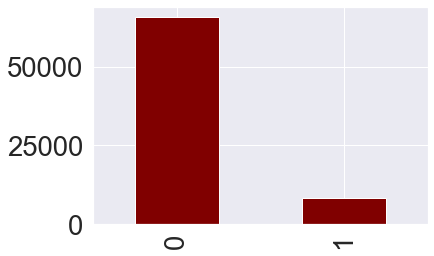

In [70]:
target_pcts = df.Target.value_counts() 
print(target_pcts)


target_pcts.plot(kind='bar',color='#800000')

We can notice the class imbalance!

In [71]:
X=df.drop('Target',axis=1)
y=df['Target']
y

0        0
1        0
2        1
3        0
4        0
        ..
74133    1
74134    0
74135    0
74136    1
74137    0
Name: Target, Length: 74138, dtype: int64

In [72]:
X

,age,duration,campaign,pdays,previous,entrepreneur,housemaid,management,retired,services,...,success,self_employed,basic9y,professional_course,university_degree,admin,blue_collar,high_school,basic6y,basic4y
0,49,227,4,999,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,37,202,2,999,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,78,1148,1,999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,59,368,2,999,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74133,73,334,1,999,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
74134,46,383,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
74135,56,189,2,999,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
74136,44,442,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [73]:
X,X_test,y,y_test=train_test_split(X,y,test_size=.3)

In [74]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25)

In [75]:
from sklearn.metrics import confusion_matrix

## Preprocessing data

* Feature engineering

* Scaling

In [76]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler =StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.values)
X_val_scaled=scaler.fit_transform(X_val.values)
X_test_scaled=scaler.fit_transform(X_test.values)

*  Handling class imbalance (Synthetic Minority Oversampling Technique)

In [77]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [78]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [79]:
from collections import Counter
counter=Counter(y)
print(counter)

Counter({0: 46011, 1: 5885})


<AxesSubplot:>

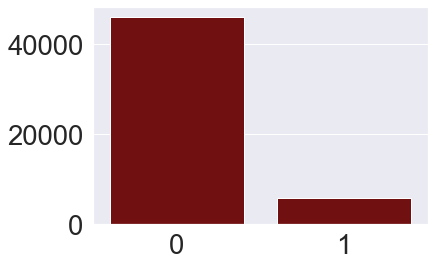

In [80]:
perc =  [i for i in counter.values()]
sns.barplot(x=list(counter.keys()),y=perc,color='#800000')

In [81]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import numpy as np
# np.array(X)
X_train1=np.array(X_train)
smote = SMOTE()
X_train_res,y_train_res=smote.fit_resample(X_train1,y_train)

In [82]:
e=Counter(y_train_res)


<AxesSubplot:>

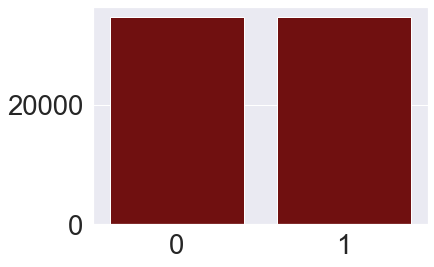

In [83]:
perc =  [i for i in e.values()]
sns.barplot(x=list(e.keys()),y=perc,color='#800000')

### Modeling and Evaluation

In [84]:
models,F1score,precision,recall,predict,roc_auc_score,preprocessing=[],[],[],[],[],[],[]
accuracy_score=[]
def test_the_models(model,X_train,y_train,X_val,y_val,pre=None):
    model.fit(X_val,y_val)
    models.append(model)
    y_pred=model.predict(X_val)
    predict.append(y_pred)
    preprocessing.append(pre)
    precision.append(precision_score(y_val,y_pred))

    print('Classification Report :')
    print(classification_report(y_val,y_pred))
    
    
    recall.append(recall_score(y_val,y_pred))
    F1score.append(f1_score(y_val,y_pred))
#     roc_auc_score.append(roc_auc_score(y_val, y_prob[:,1]))
    matrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(matrix, annot=True, fmt=".1f", linewidths=.6, 
            square = True, cmap ="RdGy")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    

* #### Classifier implementing the k-nearest neighbors vote.

>scaling

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11436
           1       0.77      0.42      0.55      1538

    accuracy                           0.92     12974
   macro avg       0.85      0.70      0.75     12974
weighted avg       0.91      0.92      0.91     12974



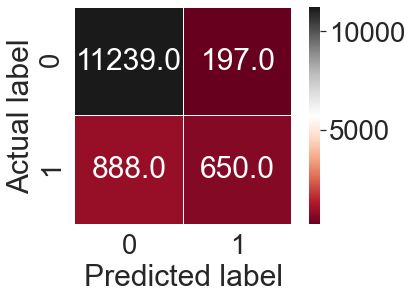

In [85]:
test_the_models(KNeighborsClassifier(),X_train_scaled,y_train,X_val_scaled,y_val,'scaling')

> Resampled data

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11436
           1       0.74      0.51      0.60      1538

    accuracy                           0.92     12974
   macro avg       0.84      0.74      0.78     12974
weighted avg       0.91      0.92      0.91     12974



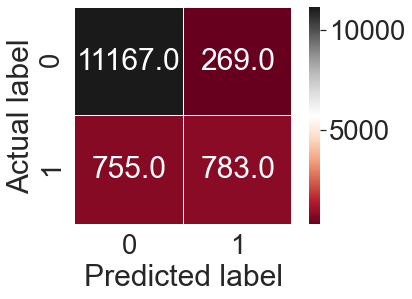

In [86]:
test_the_models(KNeighborsClassifier(),X_train_res,y_train_res,X_val,y_val,'Resampled data')

* #### Logistic Regression classifier.

> scaling

Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11436
           1       0.67      0.37      0.47      1538

    accuracy                           0.90     12974
   macro avg       0.79      0.67      0.71     12974
weighted avg       0.89      0.90      0.89     12974



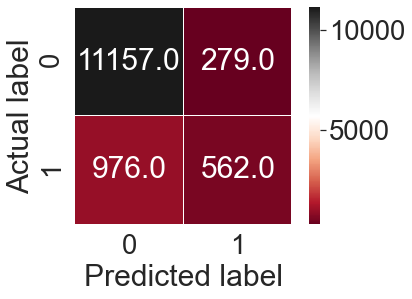

In [87]:
test_the_models(LogisticRegression(random_state=42),X_train_scaled,y_train,X_val_scaled,y_val,'scaling')

> Resampled data

Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11436
           1       0.66      0.32      0.43      1538

    accuracy                           0.90     12974
   macro avg       0.79      0.65      0.69     12974
weighted avg       0.88      0.90      0.88     12974



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


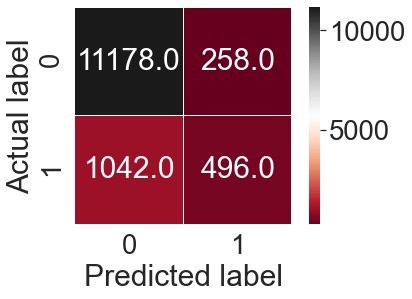

In [88]:
test_the_models(LogisticRegression(random_state=42),X_train_res,y_train_res,X_val,y_val,'Resampled data')

* #### A random forest classifier.

> Resampled data

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11436
           1       1.00      1.00      1.00      1538

    accuracy                           1.00     12974
   macro avg       1.00      1.00      1.00     12974
weighted avg       1.00      1.00      1.00     12974



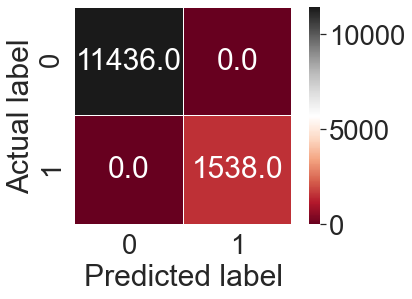

In [89]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier=RandomForestClassifier()
test_the_models(RandomForestClassifier,X_train_res,y_train_res,X_val,y_val,'Resampled data')

> scaling

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11436
           1       1.00      1.00      1.00      1538

    accuracy                           1.00     12974
   macro avg       1.00      1.00      1.00     12974
weighted avg       1.00      1.00      1.00     12974



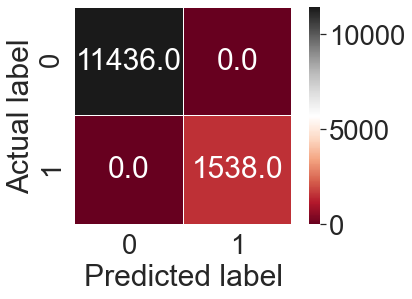

In [90]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier=RandomForestClassifier()
test_the_models(RandomForestClassifier,X_train_scaled,y_train,X_val_scaled,y_val,'scaling')

* #### Gradient Boosting for classification.



> scaling

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11436
           1       0.75      0.49      0.59      1538

    accuracy                           0.92     12974
   macro avg       0.84      0.74      0.78     12974
weighted avg       0.91      0.92      0.91     12974



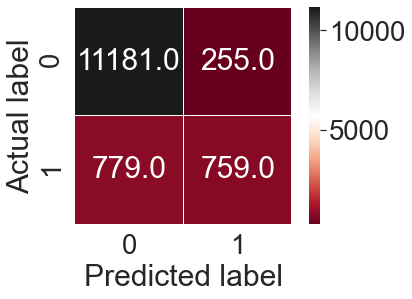

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier=GradientBoostingClassifier()
test_the_models(GradientBoostingClassifier,X_train_scaled,y_train,X_val_scaled,y_val,'scaling')

> Resampled data

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11436
           1       0.75      0.49      0.59      1538

    accuracy                           0.92     12974
   macro avg       0.84      0.74      0.78     12974
weighted avg       0.91      0.92      0.91     12974



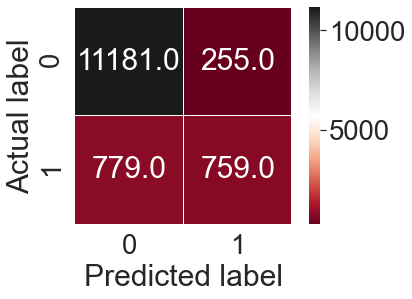

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier=GradientBoostingClassifier()
test_the_models(GradientBoostingClassifier,X_train_res,y_train_res,X_val,y_val,'Resampled data')

* #### Support vector machines (SVMs)

> scaling

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11436
           1       0.86      0.48      0.62      1538

    accuracy                           0.93     12974
   macro avg       0.90      0.73      0.79     12974
weighted avg       0.92      0.93      0.92     12974



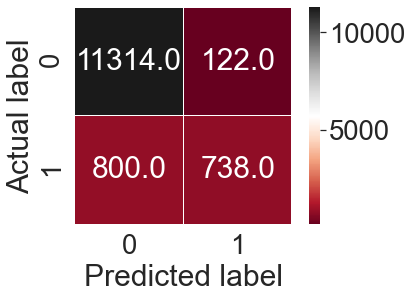

In [93]:
from sklearn.svm import SVC

SVC=SVC()
test_the_models(SVC,X_train_scaled,y_train,X_val_scaled,y_val,'scaling')

> Resampled data

Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11436
           1       0.65      0.30      0.41      1538

    accuracy                           0.90     12974
   macro avg       0.78      0.64      0.68     12974
weighted avg       0.88      0.90      0.88     12974



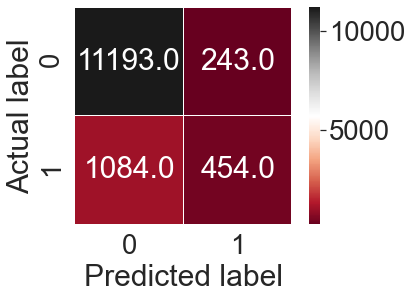

In [94]:
test_the_models(SVC,X_train_res,y_train_res,X_val,y_val,'Resampled data')

In [96]:
modelsq=['KNeighbors Classifier','KNeighbors Classifier', 'Logistic Regression','Logistic Regression','Random Forest Classifier','Random Forest Classifier','Gradient Boosting Classifier','Gradient Boosting Classifier','SVC','SVC']
M_df = pd.DataFrame({'Model':modelsq,
                            'Precision':precision,
                             "preprocessing":preprocessing,
                            'Recall':recall,
                            'F1-score':F1score})

In [97]:
M_df

,Model,Precision,preprocessing,Recall,F1-score
0,KNeighbors Classifier,0.767414,scaling,0.422627,0.545073
1,KNeighbors Classifier,0.744297,Resampled data,0.509103,0.604633
2,Logistic Regression,0.668252,scaling,0.365410,0.472467
3,Logistic Regression,0.657825,Resampled data,0.322497,0.432810
4,Random Forest Classifier,1.000000,Resampled data,1.000000,1.000000
5,Random Forest Classifier,1.000000,scaling,1.000000,1.000000
6,Gradient Boosting Classifier,0.748521,scaling,0.493498,0.594828
7,Gradient Boosting Classifier,0.748521,Resampled data,0.493498,0.594828
8,SVC,0.858140,scaling,0.479844,0.615513
9,SVC,0.651363,Resampled data,0.295189,0.406264


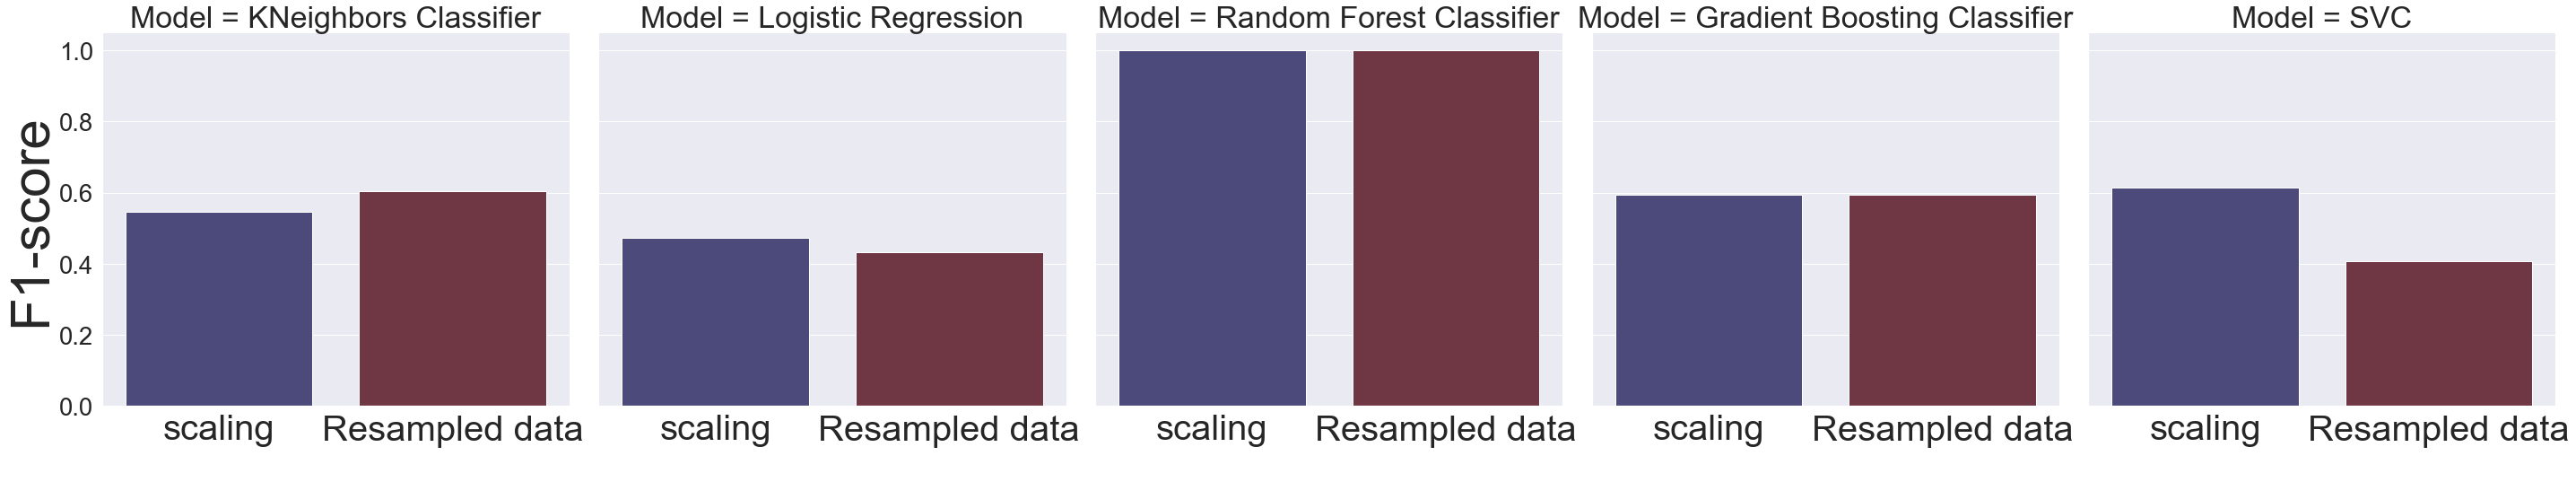

In [98]:
sns.set(font_scale=2.5)
fit = sns.FacetGrid(M_df, col="Model", height=8);
fit.map(sns.barplot,"preprocessing", "F1-score", palette='icefire', order=["scaling","Resampled data"])
fit.set_xlabels(' ')


fit.set_xticklabels(size=40)
fit.set_titles(size=34)
fit.set_ylabels('F1-score', fontsize=60)

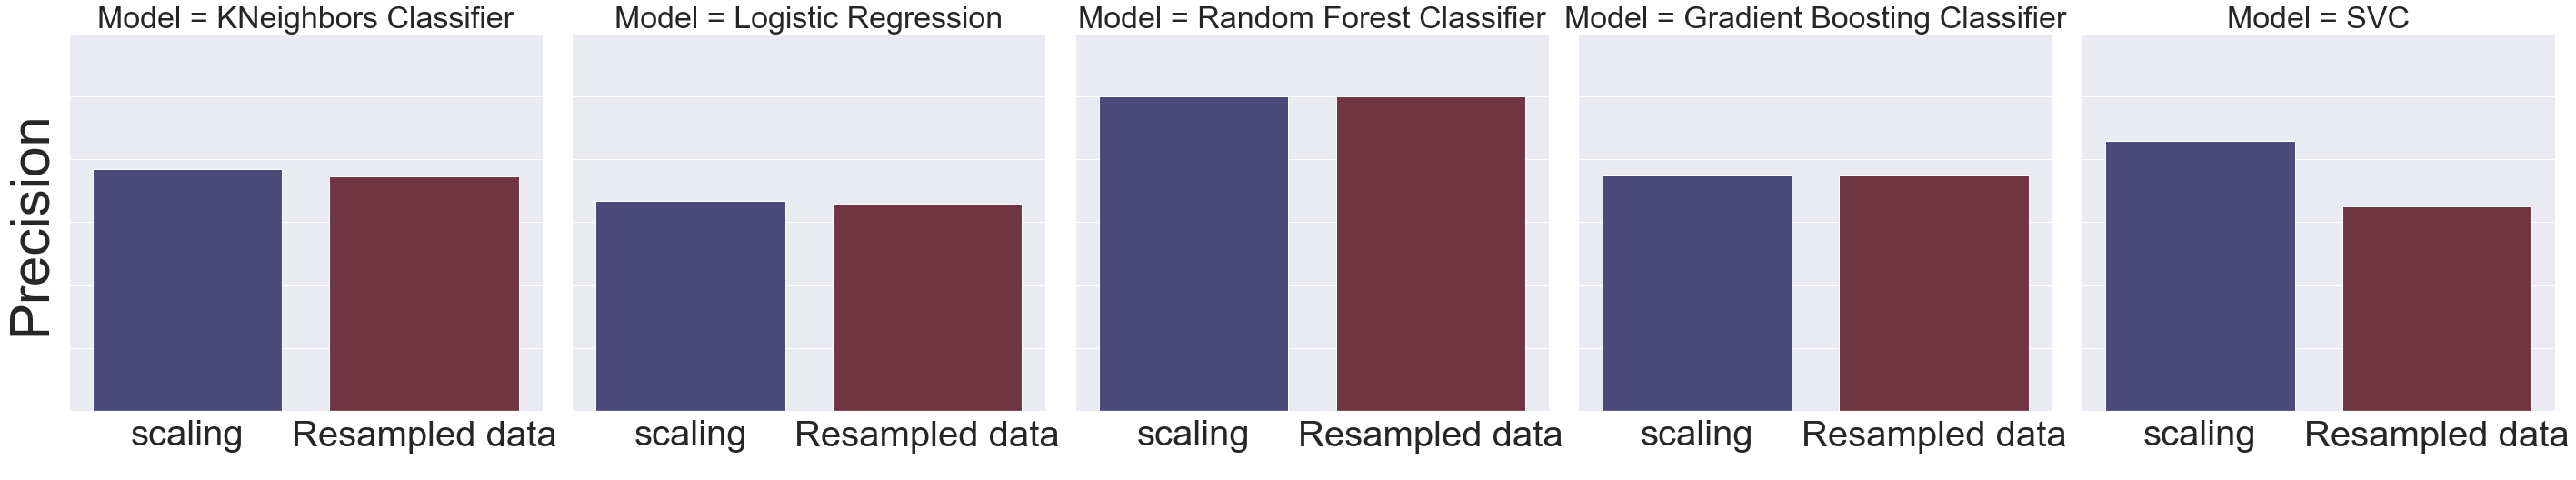

In [99]:
fit = sns.FacetGrid(M_df, col="Model", height=8);
fit.map(sns.barplot,"preprocessing", "Precision", palette='icefire', order=["scaling","Resampled data"])
fit.set_xlabels(' ', fontsize=20)
fit.set_titles(size=34)

fit.set_xticklabels(size=40)
fit.set_yticklabels(size=40)

fit.set_ylabels('Precision', fontsize=60)

We can see here from graph that **Decision Tree Classifier** perform well.

In [100]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier=RandomForestClassifier()
RandomForestClassifier.fit(X,y)

print(f'Random Forest Classifier score: {RandomForestClassifier.score(X_test, y_test):.4f}')


Random Forest Classifier score: 0.9657


Now we will improve this model using **GridSearchCv**

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [102]:
parameters = {
    'n_estimators'      : [100,200,300],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
}

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.best_params_)


0.9324546528955346
{'max_depth': 12, 'n_estimators': 100, 'random_state': 0}


Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11436
           1       0.98      0.49      0.65      1538

    accuracy                           0.94     12974
   macro avg       0.96      0.74      0.81     12974
weighted avg       0.94      0.94      0.93     12974



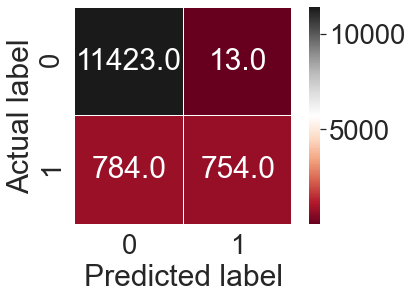

In [103]:
test_the_models(clf,X_train_scaled,y_train,X_val_scaled,y_val,'scaling')

#### Predict:

In [ ]:
X=df.iloc[:,0:5]
y=df['Target']
y

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=42)

model.fit(X,y)
pd.to_pickle(model,'/Users/hindsalem/Desktop/Project_Portuguese_Bank/Data/Dataset/model.pickle')
predictions = model.predict(X)

In [ ]:
model=pd.read_pickle('/Users/hindsalem/Desktop/Project_Portuguese_Bank/Data/Dataset/model.pickle')
# read a pickle pd.read_pickle('model.pkl')

# Take input from user
age = float(input("Enter sepal_length: "))
duration = float(input("Enter sepa_width: "))
campaign = float(input("Enter petal_length: "))
pdays = float(input("Enter petal_width: "))
previous = float(input("Enter petal_width: "))

result = model.predict([[age,duration,campaign,pdays,previous]])  # input must be 2D array
print(result)

In [ ]:
print(X.to_string(index=False))


In [ ]:
X=X.reset_index(drop=True, inplace=True)

In [ ]:
X